# Chapter 3 - AutoGluon Text Classification

[AutoGluon](https://auto.gluon.ai/stable/index.html) an open source AutoML library by [Amazon](https://www.amazon.science/amazons-autogluon-helps-developers-get-up-and-running-with-state-of-the-art-deep-learning-models-with-just-a-few-lines-of-code) that automates deep learning applications for image, text, or tabular datasets. This sample notebook presents a multiclass text classification example using AutoGluon Text Predictor. 

For reference, this notebook is tested with TensorFlow version 2.7.1 and Python 3.8.2 using Amazon SageMaker Studio ml.m5.8x.large general-purpose instance with 32 vCPU and 128GiB. [Link](https://aws.amazon.com/sagemaker/pricing) for instance pricing reference. Alternatively, you can try this on your preferred IDE.

## Install and Load the Libraries

In [2]:
# Install the necessary libraries
!pip install -U autogluon imblearn mxnet tensorflow==2.7.1

You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.


In [3]:
%matplotlib inline

import numpy as np
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from platform import python_version

warnings.filterwarnings('ignore')
np.random.seed(42)

print(f'TensorFlow version: {tf.__version__}')
print(f'Python version: {python_version()}')

TensorFlow version: 2.7.1
Python version: 3.8.2


## Prepare the Data
Load the amazon_reviews.csv raw dataset. We will use **review_body** and **star_rating** features and rebalance the dataset. 

In [4]:
# Load the raw dataset
df = pd.read_csv('amazon_reviews.csv')
data = df[['review_body','star_rating']]
data.head(10)

,review_body,star_rating
0,ok,5
1,"Perfect, even sturdier than the original!",5
2,"If the words, &#34;Cheap Chinese Junk&#34; com...",2
3,Exactly what I wanted and expected. Perfect fo...,5
4,I will look past the fact that they tricked me...,5
5,"The controls are pretty slow, and I can't get ...",3
6,The printer came in a small fairly plain box w...,3
7,Great camera for the price.,5
8,Product is very good and satisfactory.<br /><b...,5
9,"Lasted a few hours with its first charge, whic...",1


In [5]:
# Unique classes
data['star_rating'].unique()

array([5, 2, 3, 1, 4])

In [6]:
# Class frequency distribution
data['star_rating'].value_counts()

5    339469
4     86814
1     48905
3     39433
2     24686
Name: star_rating, dtype: int64

<AxesSubplot:>

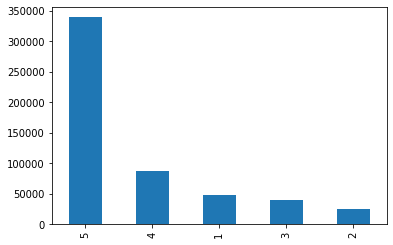

In [7]:
# Visualize class distribution
data['star_rating'].value_counts().plot(kind = 'bar')

In [8]:
# Rebalance the dataset

from imblearn.under_sampling import RandomUnderSampler 

X = data[['review_body']]
y = data[['star_rating']]

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

<AxesSubplot:xlabel='star_rating'>

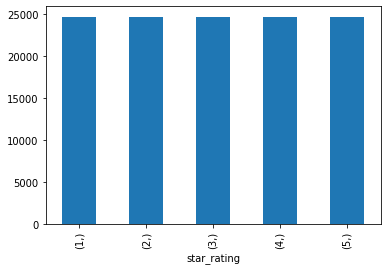

In [9]:
y_res.value_counts().plot(kind = 'bar')

In [10]:
# Merge the rebalanced dataset

rebalanced_data = X_res.join(y_res)
rebalanced_data.head(3)

,review_body,star_rating
0,This is really a piece of Junk. Instructions a...,1
1,"Did not work,",1
2,the items I received did not fit my camera it ...,1


In [11]:
# Split the training and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(rebalanced_data, test_size=0.2, random_state=42)

In [23]:
# subsample 3000 records for faster demo, you can try setting this to larger values

train_data = X_train
test_data = X_test
subsample_size = 3000  
train_data = train_data.sample(n=subsample_size, random_state=1)
test_data = test_data.sample(n=subsample_size, random_state=1)

print(f'Train_data samples: {train_data.shape[0]}')
print(f'Test_data samples: {test_data.shape[0]}')

Train_data samples: 3000
Test_data samples: 3000


## Train a Model
Define a directory for saving the trained model output by an AutoGluon Text Predictor.

In [13]:
# Set the output directory for saving model file
OUTPUT_DIR = './ag_amz_reviews'

# Clear or delete if folder exists
DO_DELETE = True 

if DO_DELETE:
  try:
    tf.compat.v1.gfile.DeleteRecursively(OUTPUT_DIR)
  except:
    pass

tf.io.gfile.makedirs(OUTPUT_DIR)
print(f'Model output directory: {OUTPUT_DIR}')

Model output directory: ./ag_amz_reviews


In [14]:
from autogluon.text import TextPredictor

predictor = TextPredictor(label='star_rating', problem_type='multiclass', eval_metric='acc', path=OUTPUT_DIR)

# lower time_limit for faster demo, try setting this to larger values in seconds. Example: predictor.fit(train_data, time_limit=600)
predictor.fit(train_data)

Extension horovod.torch has not been built: /usr/local/lib/python3.8/site-packages/horovod/torch/mpi_lib/_mpi_lib.cpython-38-x86_64-linux-gnu.so not found
If this is not expected, reinstall Horovod with HOROVOD_WITH_PYTORCH=1 to debug the build error.
Warning! MPI libs are missing, but python applications are still avaiable.


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Global seed set to 123
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name              | Type                         | Params
-------------------------------------------------------------------
0 | model             | HFAutoModelForTextPrediction | 108 M 
1 | validation_metric | Accuracy                     | 0     
2 | loss_func         | CrossEntropyLoss             | 0     
-------------------------------------------------------------------
108 M     Trainable params
0         Non-trainable params
108 M     Total params
435.582   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 0, global step 9: 'val_acc' reached 0.28400 (best 0.28400), saving model to '/root/Chapter3/ag_amz_reviews/epoch=0-step=9.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 0, global step 19: 'val_acc' reached 0.34200 (best 0.34200), saving model to '/root/Chapter3/ag_amz_reviews/epoch=0-step=19.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 29: 'val_acc' reached 0.49600 (best 0.49600), saving model to '/root/Chapter3/ag_amz_reviews/epoch=1-step=29.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 39: 'val_acc' reached 0.51600 (best 0.51600), saving model to '/root/Chapter3/ag_amz_reviews/epoch=1-step=39.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 49: 'val_acc' reached 0.55000 (best 0.55000), saving model to '/root/Chapter3/ag_amz_reviews/epoch=2-step=49.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 59: 'val_acc' reached 0.56000 (best 0.56000), saving model to '/root/Chapter3/ag_amz_reviews/epoch=2-step=59.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 69: 'val_acc' reached 0.54600 (best 0.56000), saving model to '/root/Chapter3/ag_amz_reviews/epoch=3-step=69.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 79: 'val_acc' reached 0.55600 (best 0.56000), saving model to '/root/Chapter3/ag_amz_reviews/epoch=3-step=79.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 89: 'val_acc' reached 0.56000 (best 0.56000), saving model to '/root/Chapter3/ag_amz_reviews/epoch=4-step=89.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 99: 'val_acc' reached 0.59400 (best 0.59400), saving model to '/root/Chapter3/ag_amz_reviews/epoch=4-step=99.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 109: 'val_acc' reached 0.59800 (best 0.59800), saving model to '/root/Chapter3/ag_amz_reviews/epoch=5-step=109.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 119: 'val_acc' reached 0.59800 (best 0.59800), saving model to '/root/Chapter3/ag_amz_reviews/epoch=5-step=119.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 129: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 139: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 7, global step 149: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 7, global step 159: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 8, global step 169: 'val_acc' reached 0.60200 (best 0.60200), saving model to '/root/Chapter3/ag_amz_reviews/epoch=8-step=169.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 8, global step 179: 'val_acc' reached 0.60400 (best 0.60400), saving model to '/root/Chapter3/ag_amz_reviews/epoch=8-step=179.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 9, global step 189: 'val_acc' reached 0.60200 (best 0.60400), saving model to '/root/Chapter3/ag_amz_reviews/epoch=9-step=189.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 9, global step 199: 'val_acc' was not in top 3
`Trainer.fit` stopped: `max_epochs=10` reached.


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

## Evaluation

After training, evaluate the model performance using the test dataset. By default, the evaluate() function reports the previously defined metric, i.e., accuracy. You can include additional metrics such as f1_micro score for evaluation.

In [27]:
# Evaluate the model performance with test data

test_score = predictor.evaluate(test_data, metrics=['accuracy', 'f1_micro'])
print(test_score)

Predicting: 0it [00:00, ?it/s]

{'accuracy': 0.538, 'f1_micro': 0.538}


## Prediction

Make predictions from the trained model by calling predictor.predict() function.

In [29]:
# Obtain predictions by calling predictor.predict()

review1 = "Nice camera, not as sharp as previous model"
review2 = "It doesn't work for my iPhone 5c. It said that it would work but it doesn't."

predictions = predictor.predict({'review_body': [review1, review2]})
print(f'Product Review: {review1} \nPredicted Rating: {predictions.iloc[0]}')
print(f'Product Review: {review2} \nPredicted Rating: {predictions.iloc[1]}')

Product Review: Nice camera, not as sharp as previous model 
Predicted Rating: 4
Product Review: It doesn't work for my iPhone 5c. It said that it would work but it doesn't. 
Predicted Rating: 1


In [30]:
# Predicted class-probabilities instead of predicted classes

probs = predictor.predict_proba({'review_body': [review1, review2]})
print(f'Product Review: {review1} \nPredicted Class-Probabilities:\n{probs.iloc[0]}')
print(f'Product Review: {review2} \nPredicted Class-Probabilities:\n{probs.iloc[1]}')

Product Review: Nice camera, not as sharp as previous model 
Predicted Class-Probabilities:
1    0.000180
2    0.001635
3    0.018682
4    0.964477
5    0.015026
Name: 0, dtype: float32
Product Review: It doesn't work for my iPhone 5c. It said that it would work but it doesn't. 
Predicted Class-Probabilities:
1    0.966201
2    0.031951
3    0.001510
4    0.000160
5    0.000178
Name: 1, dtype: float32


In [31]:
# Produce predictions over an entire test dataset
test_predictions = predictor.predict(test_data)
test_predictions.head()

Predicting: 0it [00:00, ?it/s]

109263    5
100223    4
114318    4
89699     5
100092    5
Name: star_rating, dtype: int64

## Save and load the model

In [33]:
## You can reload the trained predictor saved by fit(). 

loaded_predictor = TextPredictor.load('./ag_amz_reviews')
loaded_predictor.predict_proba({'review_body': [review1, review2]})

,1,2,3,4,5
0,0.000180,0.001635,0.018682,0.964477,0.015026
1,0.966201,0.031951,0.001510,0.000160,0.000178


In [34]:
# Alternatively, save the predictor to a custom location

loaded_predictor.save('my_saved_dir')
loaded_predictor2 = TextPredictor.load('my_saved_dir')
loaded_predictor2.predict_proba({'review_body': [review1, review2]})

,1,2,3,4,5
0,0.000180,0.001635,0.018682,0.964477,0.015026
1,0.966201,0.031951,0.001510,0.000160,0.000178


## Extract Embeddings

You can use a trained predictor to extract embeddings that maps each row of the data table to an embedding vector extracted from intermediate neural network representations of the row.

In [35]:
embeddings = predictor.extract_embedding(test_data)
print(embeddings)

Predicting: 0it [00:00, ?it/s]

[[-0.443095    0.8852768  -0.22515282 ...  0.98280287  0.7124626
   0.4678184 ]
 [-0.25638017  1.1947579  -0.26320583 ...  0.96593446  0.63217616
   0.4821604 ]
 [-0.12647195  0.90763193 -0.2647512  ...  0.8779049   0.5530073
   0.4224037 ]
 ...
 [-0.3200082  -0.35816762  0.2973567  ... -0.65290403  0.22764994
  -1.0387018 ]
 [-0.7020407   0.69048774 -0.28351274 ...  0.9218403   0.65880907
   0.61153847]
 [-0.4333595  -0.03296116 -0.26931185 ... -0.10652567  0.22269224
   0.1424044 ]]


We can visualize the extracted embeddings of test data using TSNE with 5 clusters corresponding to our 5 labels.

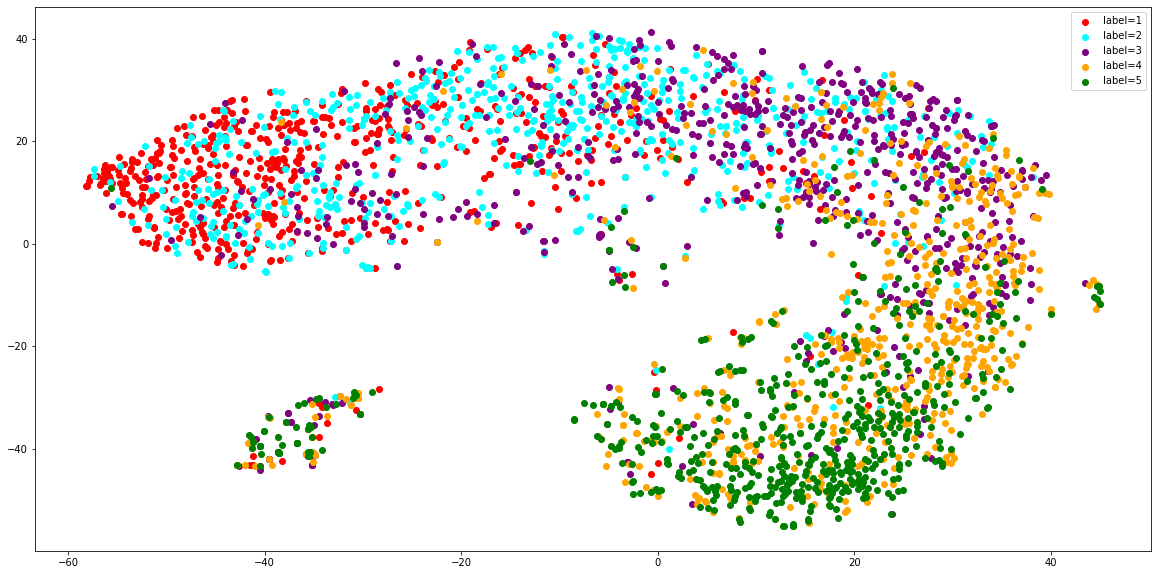

In [36]:
from sklearn.manifold import TSNE

plt.rcParams["figure.figsize"] = (20,10)

X_embedded = TSNE(n_components=2, random_state=123).fit_transform(embeddings)
for val, color in [(1, 'red'), (2, 'cyan'), (3, 'purple'), (4, 'orange'), (5, 'green')]:
    idx = (test_data['star_rating'].to_numpy() == val).nonzero()
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], c=color, label=f'label={val}')
plt.legend(loc='best')

This concludes the multiclass text classification example.